## Generátory pseudonáhodných čísel

#### Middle-squared metoda (Neumann, 1946)


Princip:
1. Zvolíme semínko o N cifrách
2. Vezmi prvotní číslo (semínko) a umocni ho na druhou (např.: 14 umocníme na 196)
3. Doplň nuly tak, aby číslo mělo 2*N číslic, kde N je velikost semínka (196 na 0196)
4. Najdi prostředek umocněného čísla a získej z něj N číslic (z 0196 vezmeme 19)
5. Získané číslo je prvotním číslem do další iterace

In [1]:
def msm(seminko, pocet_cisel):      # Middle-Squared-Method
    N = len(str(seminko))           # počet cifer stejný jako u semínka
    x = [seminko]                   # seznam náhodných čísel, 1. bude semínko
    od = 0+N//2                     # odebrat zepředu
    do = N//2+N                     # odebrat zezadu
    for i in range(pocet_cisel):
        # z posledního prvku seznamu čtverec, převést na string a doplnit nuly zleva
        mocnina = str(x[-1]*x[-1]).zfill(2*N)
        prostredek = mocnina[od:do]
        x.append(int(prostredek))
        #print(i, mocnina, prostredek)
    return x

print(msm(seminko=14, pocet_cisel=10))

[14, 19, 36, 29, 84, 5, 2, 0, 0, 0, 0]


In [13]:
print(msm(seminko=1234, pocet_cisel=100))
print(msm(seminko=1473, pocet_cisel=100))

[1234, 5227, 3215, 3362, 3030, 1809, 2724, 4201, 6484, 422, 1780, 1684, 8358, 8561, 2907, 4506, 3040, 2416, 8370, 569, 3237, 4781, 8579, 5992, 9040, 7216, 706, 4984, 8402, 5936, 2360, 5696, 4444, 7491, 1150, 3225, 4006, 480, 2304, 3084, 5110, 1121, 2566, 5843, 1406, 9768, 4138, 1230, 5129, 3066, 4003, 240, 576, 3317, 24, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1473, 1697, 8798, 4048, 3863, 9227, 1375, 8906, 3168, 362, 1310, 7161, 2799, 8344, 6223, 7257, 6640, 896, 8028, 4487, 1331, 7715, 5212, 1649, 7192, 7248, 5335, 4622, 3628, 1623, 6341, 2082, 3347, 2024, 965, 9312, 7133, 8796, 3696, 6604, 6128, 5523, 5035, 3512, 3341, 1622, 6308, 7908, 5364, 7724, 6601, 5732, 8558, 2393, 7264, 7656, 6143, 7364, 2284, 2166, 6915, 8172, 7815, 742, 5505, 3050, 3025, 1506, 2680, 1824, 3269, 6863, 1007, 140, 196, 384, 1474, 1726, 9790, 8441, 2504, 2700, 2900, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100,

#### Lineární kongruentní generátory (LCG; Lehmer, 1951)

Princip:
1. zvolíme za parametr **M** (modulus) prvočíslo nebo jeho mocninu
2. zvolíme za parametr **C** (inkrement), pro C = 0 se nazývá generátor Lehmerův
3. zvolíme za parametr **A** (násobek) 
4. algoritmus vyžaduje semínko seed, které bude představovat první $x_i$
5. vypočítáme další náhodné číslo vzorcem: $$X_{i+1}=(A*X_i+C)\mod M$$

In [14]:
def lcg(x_old, A, C, M):        # předešlé x, násobek, inkrement, modulus
    return (A * x_old + C) % M

ncisel = 10
seminko = 1
x = seminko
for i in range(ncisel):
    x = lcg(x, A=2, C=0, M=9)
    print(i, x)

0 8
1 7
2 5
3 1
4 2
5 4
6 8
7 7
8 5
9 1


**ANSI C nastavení LCG**

In [15]:
def lcg(x_old, A, C, M):        # předešlé, násobek, inkrement, modulus
    return (A * x_old + C) % M

ncisel = 10
seminko = 1
x = seminko
for i in range(ncisel):
    x = lcg(x, A=1103515245, C=12345, M=2**31)
    print(i, x)

0 1103527590
1 377401575
2 662824084
3 1147902781
4 2035015474
5 368800899
6 1508029952
7 486256185
8 1062517886
9 267834847


#### Fibonacciho generátor

In [21]:
def fibgen1(n, s, m): # počet čísel, poč. hodnoty, modulus
    for i in range(n):
        s.append((s[i] + s[i+1]) % m)
    return s

pocet_cisel = 20
print(fibgen1(n=pocet_cisel, s=[5, 7], m=17))

[5, 7, 12, 2, 14, 16, 13, 12, 8, 3, 11, 14, 8, 5, 13, 1, 14, 15, 12, 10, 5, 15]


#### Opožděný Fibonacciho generátor (Mitchell, Moore, 1958)

využívá obecné hodnoty opožděnosti

Princip:
1. Zvol parametry j a k (indexy opožděných parametrů Fibonacciho posloupnosti), j < k
2. Vyber operaci *o* pro opožděné parametry (+, -, *, /, atd.)
3. Zvol semínko (hodnoty opožděných parametrů)
4. Vypočti novou hodnotu vzorcem: **s** = (**sj** o **sk**) *mod* **M**
5. Ulož novou hodnotu fo Fibonacciho posloupnosti a opakuj

In [25]:
from operator import add, sub, mul

def fibgen(n, s, j, k, m, func): # počet čísel, poč. hodnoty, opoždění j a k, M, operace
    for i in range(n):
        if 0 <= i <= k:
            s.append(s[i])
        else:
            s.append((func(s[i-j], s[i-k])) % m)
    return s

pocet_cisel = 20
print(fibgen(n=pocet_cisel, s=[8, 6, 7, 5, 3, 0, 9], j=3, k=7, m=10, func=add))

[8, 6, 7, 5, 3, 0, 9, 8, 6, 7, 5, 3, 0, 9, 8, 6, 6, 3, 9, 7, 4, 1, 6, 6, 3, 9, 6]


#### Pravidlo 30 (Wolfram, 1983)
model, který se skládá z jednoduchých pravidel pro aktualizaci buněk v mřížce podle stavu jejich sousedů
- schopnost generovat složité a zdánlivě náhodné vzory

Princip:
1. Nastav prvotní řádek buněčného automatu na binární 0, prostředek na binární 1
2. Proveď vývoj buněčného automatu do zvolené generace pomocí pravidla 30
3. Vyber prostřední sloupec, přeskoč N bitů (semínko) a získej 8 binárních číslic
4. Vytvoř z M binárních číslic poseudonáhodné číslo

In [ ]:
!python -m pip install numpy
!python -m pip install matplotlib

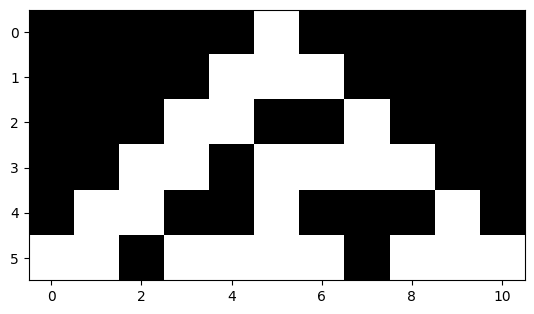

In [21]:
import matplotlib.pyplot as plt

# pravidlo 30 buněčného automatu A xor (B or C)
#000 = 0
#001 = 1 
#010 = 1
#011 = 1
#100 = 1
#101 = 0
#110 = 0
#111 = 0
#-------
# dec = 2 + 4 + 8 + 16 = 30 
def pravidlo30(t):
    return t[0] ^ (t[1] or t[2])


# získej trojici bitů vedle sebe (vlevo, vpravo, uprostřed) pro výpočet hodnoty pravidlem
def ziskej_trojice(automat):
    return zip(automat, automat[1:], automat[2:])       


# vypočítá nový řádek automatu pomoci pravidla z postupných trojic v řádku
def novy_stav(automat):
    return [pravidlo30(t) for t in ziskej_trojice([0] + automat + [0])] # nuly kvůli okrajům matice


# všude bitová hodnota 0, uprostřed prvního řádku jedna bitová 1
def pocatecni_stav_automatu(sirka):
    prvni_radek = [0]*sirka  
    if sirka%2:                 # sudá šířka, stačí najít střed a změnit 0 na 1
        prvni_radek[sirka // 2] = 1
    else:                       # lichá šířka, musíme přidat doprostřed bit s hodnotou 1
        prvni_radek.insert(sirka//2, 1)
    return prvni_radek


def generuj_automat(sirka):
    automat = [pocatecni_stav_automatu(sirka)]  # první řádek automatu (sirka = 2 * počet generací)
    while not automat[-1][0]:                   # opakuj, dokud automat nemá požadovanou šířku (bit 1 na kraji)
        automat.append(novy_stav(automat[-1]))  # nový řádek vypočítaný z předešlého
    return automat


# vykresli bunecny automat na obrazovku         # matice 
n_generaci = 5                                  # počet řádků (např. 100)
automat = generuj_automat(sirka=2*n_generaci)   # šířka dvojnásobná
#print(automat)
plt.imshow(automat, cmap="gray")
plt.show()
#plt.savefig("automat.png")

Použití buněčného automatu pro náhodná čísla

In [28]:
# získá prostřední sloupec z buněčného automatu
def ziskej_prostredni_sloupec(automat, sirka):
    return [automat[i][sirka//2] for i in range(len(automat))]


# získá náhodná čísla z prostředního sloupce buněčného automatu (8bitové integery)
def ziskej_nahodna_cisla(prostredni_sloupec, seminko):
    nahodna_cisla = []

    # skakej po osmicich ve sloupci a vynech tolik prvnich bitu, jake je seminko
    for i in range(seminko, len(prostredni_sloupec), 8):

        # ziskej 8 bitu, ktere jsou aktualne na rade a preved je do retezce binarnich cislic
        bity = "".join(list(map(str, prostredni_sloupec[i:i+8])))

        # pokud jsme na konci seznamu a nevyzbylo plnych 8 bitu na cislo, tak ukonci
        if len(bity) < 8:
            return nahodna_cisla

        # pripoj do seznamu cisel integer ziskany z retezce binarnich cislic
        nahodna_cisla.append(int(bity, base=2))

    return nahodna_cisla

# nejprve vygenerujeme automat pomoci pravidla 30, na sirce zavisi pocet ziskaych nahodnych cisel
pocet_generaci = 100
automat = generuj_automat(sirka=2*pocet_generaci)

#vysekame prostredni sloupec, preskocime prvnich nekolik bitu podle seminka a ziskame nahodna cisla
seminko = 10
prostredni_sloupec = ziskej_prostredni_sloupec(automat, sirka=2*pocet_generaci)
nahodna_cisla = ziskej_nahodna_cisla(prostredni_sloupec, seminko)
print(nahodna_cisla)

[22, 78, 185, 213, 134, 86, 175, 195, 197, 112, 75]


#### Mersenne Twister (Matsumoto, Nishimura, 1998)

- Jeden z nejvyužívanějších algoritmů 
- Python v modulu random
- Nejvyužívanější verze MT19937
- Přiložený kód jen pro náhled na složitost moderních algoritmů.

In [29]:
# koeficienty pro MT19937
(w, n, m, r) = (32, 624, 397, 31)
a = 0x9908B0DF
(u, d) = (11, 0xFFFFFFFF)
(s, b) = (7, 0x9D2C5680)
(t, c) = (15, 0xEFC60000)
l = 18
f = 1812433253
lower_mask = 0x7FFFFFFF
upper_mask = 0x80000000

# seznam pro ukládání stavu generátoru
MT = [0 for i in range(n)]
index = n+1


# generovani naslednich n hodnot serie
def twist():
    for i in range(0, n):
        x = (MT[i] & upper_mask) + (MT[(i+1) % n] & lower_mask)
        xA = x >> 1
        if (x % 2) != 0:
            xA = xA ^ a
        MT[i] = MT[(i + m) % n] ^ xA


# ziskej nove nahodne cislo
def mersenne_twister():
    global index

    #pokud je index vetsi jak parametr n, pak se twistuje a resetuje se index
    if index >= n:
        twist()
        index = 0

    #vypocet noveho nahodneho cisla
    y = MT[index]
    y = y ^ ((y >> u) & d)
    y = y ^ ((y << s) & b)
    y = y ^ ((y << t) & c)
    y = y ^ (y >> l)

    index += 1
    return y & 0xffffffff


# inicializace MT generátoru
def mt_seed(seed):
    MT[0] = seed
    for i in range(1, n):
        temp = f * (MT[i-1] ^ (MT[i-1] >> (w-2))) + i
        MT[i] = temp & 0xffffffff


if __name__ == '__main__':
    
    #spuštění generátoru
    mt_seed(0)
    pocet_cisel = 10
    x = [mersenne_twister() for i in range(pocet_cisel)]
    print(x)

[2357136044, 2546248239, 3071714933, 3626093760, 2588848963, 3684848379, 2340255427, 3638918503, 1819583497, 2678185683]


### 7.2 Skutečná náhodná čísla
využití API služby Random.org ke generování náhodných čísel

In [ ]:
!python -m pip install requests

In [ ]:
# ke spuštění programu je nutná registrace k službě Random.org!
import requests                 # umožňuje snadnou práci s HTTP požadavky
import json                     # funkce pro práci s formátem JSON

def true_random(klic, metoda, pocet_cisel, min_cislo, max_cislo):

    pozadavek = {               # informace pro požadavek k API službě Random.org
        "jsonrpc": "2.0",
        "method": "generateIntegers",
        "params": {
            "apiKey": klic,     # API klíč pro přístup k službě Random.org
            "n": pocet_cisel,   # počet požadovaných náhodných čísel
            "min": min_cislo,   # minimální hodnota, kterou mohou náhodná čísla nabývat
            "max": max_cislo,   # maximální hodnota, kterou mohou náhodná čísla nabývat
            "replacement": True
        },
        'id':1
    }
    pozadavek = json.dumps(pozadavek)   # serializace do formátu JSON

    hlavicka = {                        # informace o typu a délce obsahu a formátu
        'Content-type': 'application/json',
        'Content-Length': '200', 
        'Accept': 'application/json'
    }

    odpoved = requests.post(            # HTTP POST požadavek na danou URL
        url='https://api.random.org/json-rpc/2/invoke',
        data=pozadavek,
        headers=hlavicka
    )

    return odpoved.text["result"]["random"]["data"]


klic = "sem napište svůj API klíč"
x = true_random(klic=klic, metoda="generateIntegers", pocet_cisel=20, min_cislo=1, max_cislo=9)
print(x)


### 7.3 Modul Random

Základní modul pythonu pro generování náhodných čísel
- využívá generátor Mersenne Twister
- obsahuje spousty užitečných metod nad čísly z Mersenne Twisteru

#### Nastavení semínka

- pokud nezvolíme semínko, je semínko voleno náhodně při každém spuštění
- pro opakovatelnost pokusů a debugování programu je vhodné nastavit pevné semínko

In [23]:
from random import randint, seed

# po každém nastavení semínka se vyresetuje generátor
seed(1)
x1 = [randint(1,9) for i in range(10)]
print(x1)

seed(1)         # znovu nastavíme stejné semínko
x2 = [randint(1,9) for i in range(10)]
print(x2)       # tato sekvence bude úplně stejná

# tato sekvence bude jiná díky jinému semínku
seed(2)
x3 = [randint(1,9) for i in range(10)]
print(x3) 

[3, 2, 5, 2, 8, 8, 8, 7, 4, 2]
[3, 2, 5, 2, 8, 8, 8, 7, 4, 2]
[1, 2, 2, 6, 3, 5, 5, 4, 1, 3]


#### Generování desetinných čísel

Základní funkce generátoru random je generování desetinných čísel v rozmezí 0 až 1
- využívá rovnoměrné (uniformní) rozdělení
- pokud potřebujeme jiný rozsah, můžeme provést transformaci náhodné veličiny


In [24]:
from random import random

#základní funkce
x = [random() for i in range(5)]
print(x)

#transformace náhodné veličiny
min_cislo = -2
max_cislo = 8
x = [min_cislo + random()*(max_cislo - min_cislo) for i in range(5)]
print(x)


[0.9997187959452691, 0.6384713381046937, 0.8036694431529349, 0.8602441027374532, 0.5090674530669709]
[1.7206029552353206, 7.357116851572259, 3.020672922450359, 7.01207797496947, 6.710329683679705]


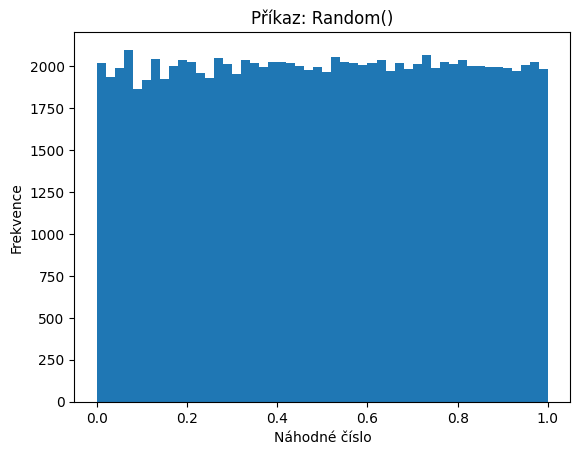

In [27]:
import matplotlib.pyplot as plt

x = [random() for i in range(100000)]       # vektor náh. čísel
plt.hist(x, bins=50)                        # histogram
# plt.gca() vrací aktuální osu
plt.gca().set(title='Příkaz: Random()', ylabel='Frekvence', xlabel="Náhodné číslo");

#### Generování celých čísel

Pokud chceme generovat náhodná celá čísla, tak existuje velice snadno použitelná metoda randint s inkluzivními hranicemi.

In [ ]:
from random import randint

min_cislo = -2
max_cislo = 4

x = [randint(min_cislo, max_cislo) for i in range(10)]
print(x)

[2, -2, 2, -1, 4, -2, -2, 2, -1, 0]


#### Náhodné číslo z Gaussovského rozdělení

Gaussovské rozdělení je rozdělení, kde převážná část hodnot se vyskytuje kolem jedné centrální hodnoty (střední hodnota) a odchyluje se od ní s nějakým rozptylem hodnot. Tato data jsou typická nejen pro fyzikální, ale i pro sociologické a fyziologické jevy.

In [ ]:
from random import gauss

stredni_hodnota = 0
rozptyl = 1

x = [gauss(mu=stredni_hodnota, sigma=rozptyl) for i in range(5)]
print(x)

[0.597289049926169, -0.9952258437624236, -0.4123441060646524, 0.2740635713925431, -0.3804814025718362]


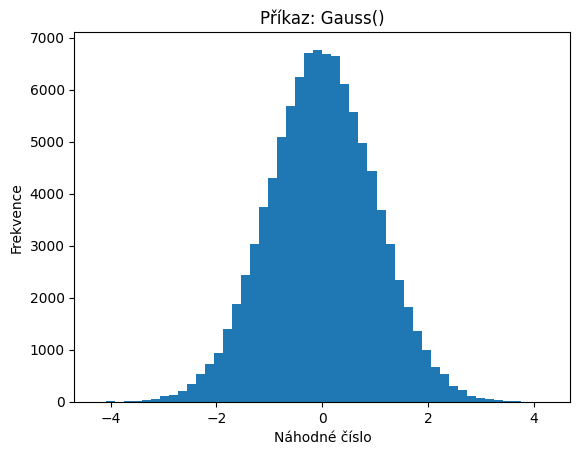

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [gauss(mu=0, sigma=1) for i in range(100000)]
plt.hist(x, bins=50)
plt.gca().set(title='Příkaz: Gauss()', ylabel='Frekvence', xlabel="Náhodné číslo");

Normální rozdělení podle centrální limitní věty

[13.007787920608052, 5.642591776723551, 10.326232960475345, 8.623697188496513, 12.828400676285629, 11.481685794321777, 10.374423068221652, 8.699189698022536, 8.433635614125981, 10.29946083248836]


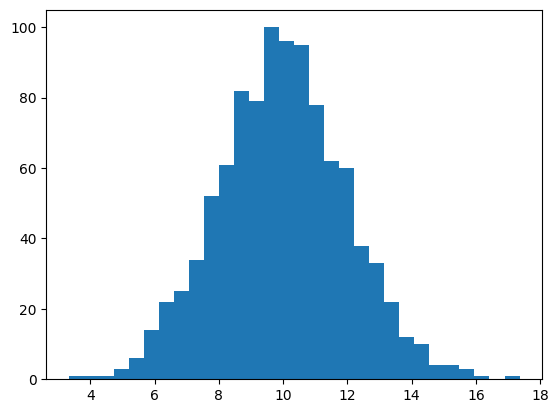

In [56]:
# generování normálního rozdělení pomocí centrální limitní věty
import random
import math
import matplotlib.pyplot as plt

def normal(mu, sigma, n):                   # stř. hodnota, směrodatná odchylka, počet NČ
    suma = 0
    for i in range(n):                      # sečíst náhodná čísla z uniformního rozdělení
        suma += random.uniform(0, 1)
    # použití CLV k aproximaci normálního rozdělení
    norm = (suma - n/2) / math.sqrt(n/12)   # normalizace
    norm = norm * sigma + mu                # hodnota s daným průměrem a odchylkou
    return norm

# generování seznamu pro mu=5 a sigma=2
mu = 10                     # průměr
sigma = 2                   # směrodatná odchylka
n = 1000                    # počet náhodných čísel

x = [normal(mu, sigma, n) for i in range(n)]

print(x[:10])     # výpis prvních 10 prvků seznamu
plt.hist(x, bins=30)
plt.show()

#### Náhodný výběr prvků z kolekce

Typický způsob výběru prvků z nějaké kolekce v jazycích typu C je vygenerování náhodného celého čísla, reprezentující index do kolekce. Python tento způsob urychluje přímým náhodným výběrem z kolekce.

In [ ]:
from random import choice

studenti = ["Feránek", "Rýkorová", "Žgvor", "Nuba", "Kosel", "Laškov", "Varilla", "Hubera"]
x = choice(studenti)

print(f"K tabuli půjde: {x}")

K tabuli půjde: Kosel


#### Náhodný výběr podmnožiny z kolekce

V mnoha situacích potřebujete vybrat více náhodných prvků z kolekce bez opakování. Naivní způsob by byl udělat si kopii kolekce, vybrat náhodný element a element z kolekce odebrat (destruktivní způsob = mění stav programu). Existuje i nedestruktivní výběr podmnožiny z kolekce.

In [33]:
from random import sample

studenti = ["Feránek", "Rýkorová", "Žgvor", "Nuba", "Kosel", "Laškov", "Varilla", "Hubera"]
pocet_dobrovolniku = 3
x = sample(studenti, pocet_dobrovolniku)

print(f"Dobrovolnici: {x}")

Dobrovolnici: ['Feránek', 'Varilla', 'Laškov']


#### Zamíchání kolekce

V mnoha karetních hrách nebo v čase/vlastnosti seřazených datech je zapotřebí data rozmíchat. Python umožňuje rychlé rozmíchání kolekce.

In [ ]:
from random import shuffle 

vysky_studentu = [150, 155, 155, 157, 165, 168, 174, 174, 178, 180, 184, 187, 191, 191]
shuffle(vysky_studentu)
print(vysky_studentu)

[178, 155, 187, 157, 165, 180, 174, 174, 150, 191, 168, 191, 184, 155]


### 7.4 Numpy.random

Knihovna numpy je základem pro knihovny pro strojové učení a analýzu dat 

- používá odlišný generátor než modul random
- má jemně odlišné API pro volání funkcí
- pracuje s tenzory n-tého řádu
    - dokáže vygenerovat současně více čísel do vektoru, matice, tenzoru 


#### Nastavení semínka

In [ ]:
from numpy.random import seed, rand

seed(1)

nahodny_vektor = rand(5)
print(nahodny_vektor)

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]


#### Generování tenzorů

In [ ]:
nahodna_matice = rand(3, 2)
print(nahodna_matice)

[[0.09233859 0.18626021]
 [0.34556073 0.39676747]
 [0.53881673 0.41919451]]


In [ ]:
nahodny_tenzor = rand(2, 2, 3)
print(nahodny_tenzor)

[[[0.69232262 0.87638915 0.89460666]
  [0.08504421 0.03905478 0.16983042]]

 [[0.8781425  0.09834683 0.42110763]
  [0.95788953 0.53316528 0.69187711]]]


#### Celá čísla

In [51]:
from numpy.random import randint

#pozor! hodnota horní hranice (tzv. high) je exkluzivní!
nahodny_vektor = randint(1, 9, 20)
print(nahodny_vektor)

[5 6 1 4 5 2 5 1 3 4 1 7 6 7 1 6 5 7 8 5]


In [ ]:
nahodny_tenzor = randint(low=1, high=9, size=(2, 4, 3))
print(nahodny_tenzor)

[[[2 4 5]
  [3 5 1]
  [6 4 2]
  [3 8 1]]

 [[5 2 8]
  [3 8 8]
  [3 2 1]
  [7 2 4]]]


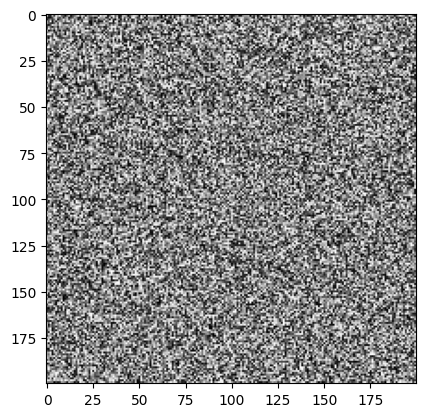

In [2]:
from numpy.random import randint
import matplotlib.pyplot as plt

cernobily_obrazek = randint(low=0, high=256, size=(200, 200))
plt.imshow(cernobily_obrazek, cmap="gray")

#### Gaussovské rozdělení

In [ ]:
from numpy.random import randn

# mu = 0, sigma = 1
nahodne_gauss_hodnoty = randn(10)

print(nahodne_gauss_hodnoty)

[ 0.25502607 -0.33288118  0.56623145  0.37238649  1.52246149  0.80809112
 -0.74438535  0.81303158  1.32765707  1.62734082]


In [ ]:
# gaussovské hodnoty si musíme ručně škálovat transformací náhodné veličiny
mu = 100
sigma = 25
skalovane_gauss_hodnoty = mu + randn(10)*sigma
print(skalovane_gauss_hodnoty)

[118.26473035  93.56627654 126.97397513  67.10145381 113.75976396
 130.5839976   57.88533936  96.8629192  133.93995586 137.25515993]


#### Shuffle

In [ ]:
from numpy.random import shuffle
from numpy import matrix

#shuffle v matici jen prohodi radky
matice = matrix("1 2 3; 4 5 6; 7 8 9")
shuffle(matice)

print(matice)

[[1 2 3]
 [7 8 9]
 [4 5 6]]


#### Užitečná rozdělení

V průběhu studia narazíte v různých předmětech (simulace systémů, kvantitativní management, optimalizace, dependabilita) na spousty problémů, které vyžadují náhodné veličiny. Tyto náhodné veličiny nemusí nabývat nutně hodnot z jednoho intervalu stejnoměrně. Charakter hodnot náhodné veličiny popisuje tzv. distribuce. Numpy.random umožňuje generovat náhodná čísla z různých rozdělení. Zde jsem pro vás připravil některá známá užitečná rozdělení pro různé oblasti od společenských věd po fyziku.

**Binomické (Bernoulliho) rozdělení**

Slouží pro modelování toho, kolikrát pozorujeme určitý náhodný jev z celkového počtu pozorování, pokud známe pravděpodobnost, se kterou nastává.

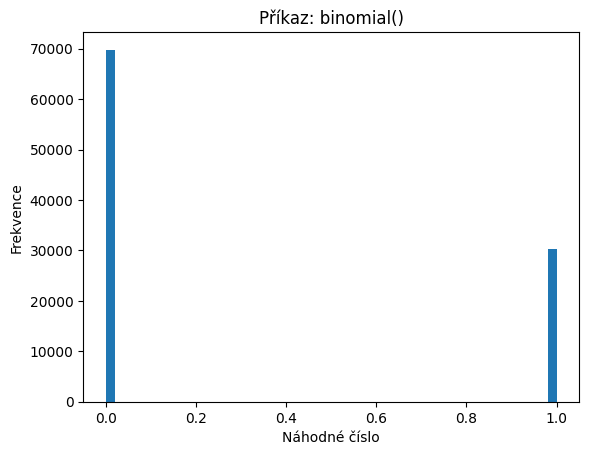

In [3]:
from numpy.random import binomial
import matplotlib.pyplot as plt
%matplotlib inline

# na upravené minci je šance, že padne hlava (vysledek=1) 30%
x = [binomial(n=1, p=0.3) for i in range(100000)]

# graf udává, kolikrát při opakováni 100 000 hodů padla hlava (1) a kolikrát orel (0)
plt.hist(x, bins=50)
plt.gca().set(title='Příkaz: binomial()', ylabel='Frekvence', xlabel="Náhodné číslo");

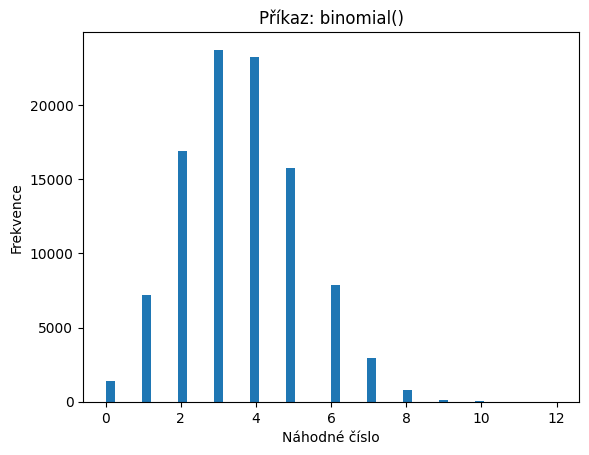

In [4]:
from numpy.random import binomial

# Student má potíže se vstáváním. Pravděpodobnost, že zaspí, je 0,3. V semestru je 12 přednášek. 
x = binomial(n=12, p=0.3, size=100000)

# Graf udává, kolikrát zaspal daný počet přednášek při opakování 100000 experimentů
plt.hist(x, bins=50)
plt.gca().set(title='Příkaz: binomial()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Geometrické rozdělení**

Modeluje počet neúspěchů před prvním úspěchem v řadě Bernoulliovských pokusů. Příklady takových jevů jsou: "Kolikrát musí člověk hodit kostkou (neúspěšně) než padně číslo 6 (úspěch)?", "Kolikrát musím vsadit tiket se stejnými čísly ve sportce, než vyhraji?".

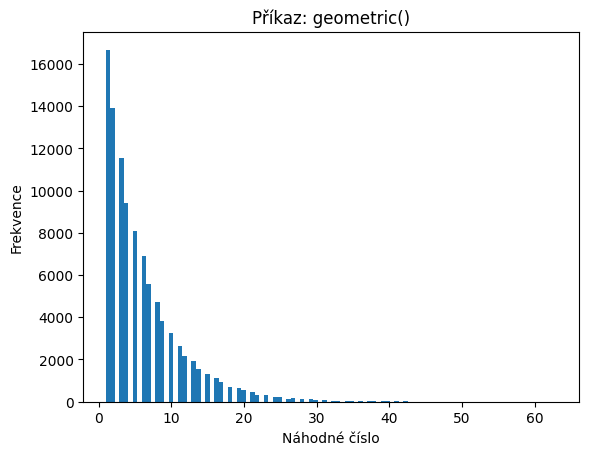

In [5]:
from numpy.random import geometric

#Kolikrat musí člověk hodit 6-stěnnou kostkou než padně číslo 6? Opakujeme 100000
x = geometric(p=1/6, size=100000)
plt.hist(x, bins=100)
plt.gca().set(title='Příkaz: geometric()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Beta rozdělení**

Beta rozdělení je obecné rozdělení, ze kterého vychází moho dalších dílčích dělení. Představuje pravděpodobnostní rozdělení pravděpodobností. Lze ho použít pro modelování jevů jako: jaká je pravděpodobnost, že uživatel klikne na reklamu?, jaká je pravděpodobnost, že ANO vyhraje příští volby? jaká je pravděpodobnost, že člověk s rakovinou přežije více jak 5 let?

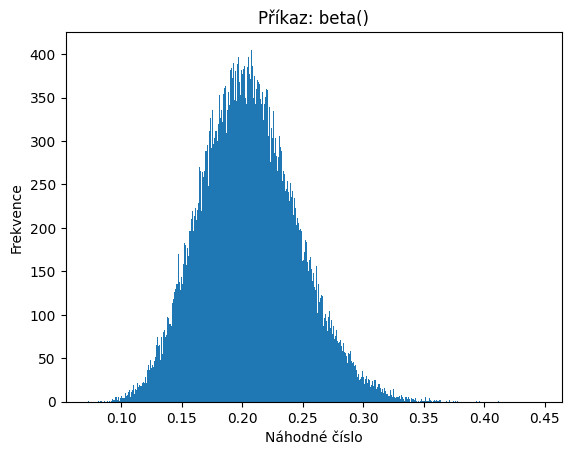

In [6]:
from numpy.random import beta

#a = alfa parametr, počet úspěchů + 1
#b = beta parametr, počet neúspěchů + 1
#příklad: na kolik (x) procent je pravděpodobné, že se mnou půjde dívka z Tinderu na rande, když
#  80  z celkového počtu 100 oslovených dívek mě odmítlo a 20  přijalo?
x = beta(a=21,b=81, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: beta()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Gama rozdělení**

Rozdělení, které se nejčastěji používá v ekonometrii a jejích podoborech (optimalizace, kvantitativní management, operační výzkum) pro modelování čekacích dob ve frontách. Lze také použít pro modelování demografických jevů, kde se používá pro dobu života člověka. Při studiu na naší katedře se s ním také můžete setkat při studiu oboru dependability informačních systémů, kde se používá při modelování bezporuchového provozu.

Velice populární sou jeho specifičtější verze a to: Exponenciální rozdělení (doba života do poruchy trvale nenamáhané komponenty), Erlangovo rozdělení (doba života do n-té poruchy komponenty) a Chí-kvadrát rozdělení (testování hypotéz), se kterými se během studia setkáte. I ty všechny naleznete v numpy.rand.

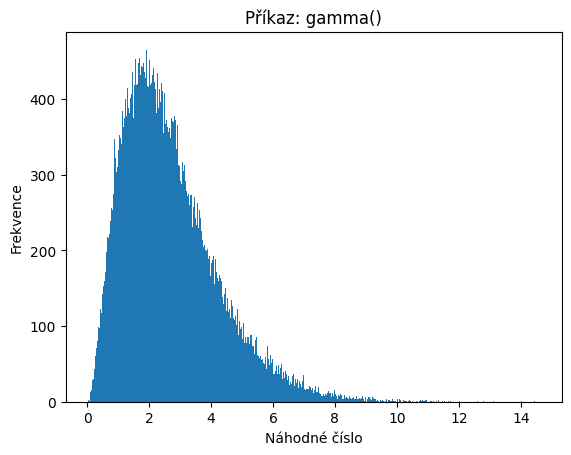

In [7]:
from numpy.random import gamma

#Jak dlouho potrvá než se rozpadnou tři izotopy Thoria , pokud je poločas rozpadu Thoria 0.9 sekundy
#shape = počet událostí, který mě zajímá
#scale = průměrná doba mezi událostmi 
x = gamma(shape=3, scale=0.9, size=100000)

plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: gamma()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Exponenciální rozdělení**

Jedná se o gama rozdělení s parametrem shape=1 (můžete si vyzkoušet).

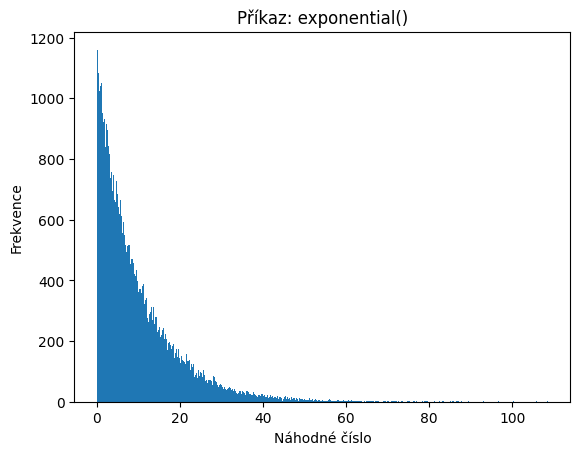

In [8]:
from numpy.random import exponential

#Počítačový disk vydrží průměrně 5 let než selže. Jaká je pravděpodobnost, že vydrží N let?
x = exponential(scale=10, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: exponential()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Mocniné rozdělení**

Pro případ obecného mocniného rozdělení lze použít funkci power, kde lze oproti exponenciálnímu volit i základ (u exponenciálního je základ Eulerovo číslo e).

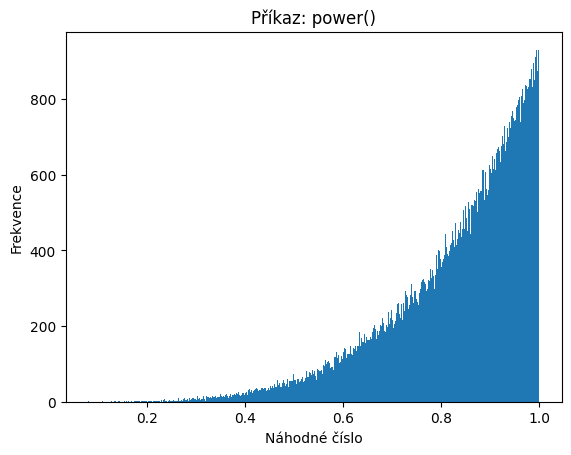

In [9]:
from numpy.random import power

x = power(5, size=100000)
plt.hist(x, bins=500)
plt.gca().set(title='Příkaz: power()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Poissonovo rozdělení**

Poissonovo rozdělení úzce souvisí s gama rozdělením. Gama rozdělení ukazuje časový interval, po který nedojde k nějaké události (nebo počtu událostí). Poissonovo rozdělení naopak ukazuje kolikrát dojde k události za daný časový interval. Události musí být náhodné a vzájemně nezávislé. Jedná se o limitní případ binomického rozdělení.

Jevy, které se řídí tímto rozdělením jsou například: počet příchozích telefonátů na zákaznické licence, počet fotonů, které dorazí do teleskopu v astronomii, počet ztrát za měsíc v pojišťování, počet rozpadů nuklidů v radiofyzice, atd.

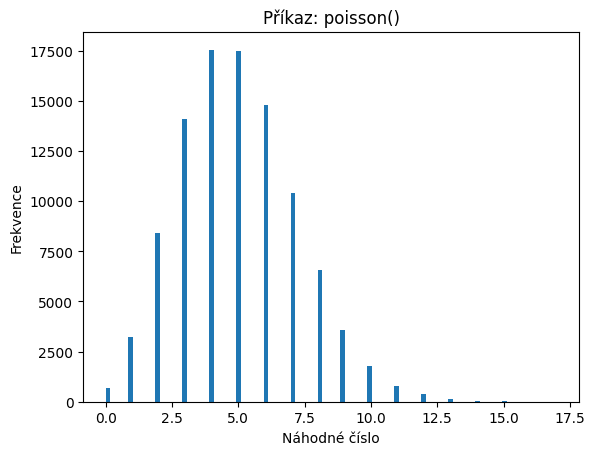

In [10]:
from numpy.random import poisson

#Podomní prodejce prodá v průměru 5 hrnců s tajemného samorozpouštěcího materiálu za den. 
# Jaká je pravděpodobnost, že počet prodaných hrnců za den bude N?
x = poisson(lam=5, size=100000)
plt.hist(x, bins=100)
plt.gca().set(title='Příkaz: poisson()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Normální (gaussovské) rozdělení**

Jedná se nejdůležitější rozdělení v mnoha oblastech vědy díky limitnímu centrálnímu teorému. Ten říká (laicky), že náhodné veličiny konvergují při akumulaci k jedné střední hodnotě od které se odchylují rozptylem. Ačkoliv je výška vybrané osoby na ulici náhodná veličina, pokud provedeme spousty měření, bude výška distribuce výšky sledovat normální rozdělení, tedy rozdělení se zvonovitým (bell) průběhem. Tento teorém je tak silný v našem světě, že pokud budete chodit po UJEPu a ptát se studentů na číslo v rozmezí od 1 do 100, tak volba čísla bude při dostatečném počtu vzorku odpovídat normálnímu rozdělení.


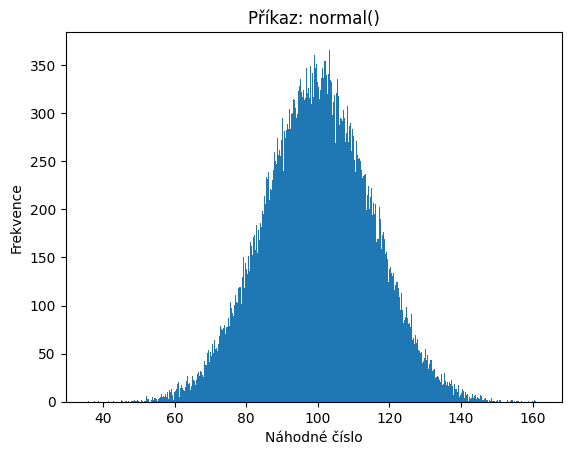

In [11]:
from numpy.random import normal

#modelování IQ, střední hodnota 100 a rozptyl 15
x = normal(loc=100, scale=15, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: normal()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Laplaceovo rozdělení**

Jedná se o další symetrické rozdělení kolem střední hodnoty s rozptylem (stejně jako normální rozdělení), který vytváří dvojitou exponenciální funkci kolem střední hodnoty (oproti normálnímu rozdělení má tedy čistě konvexní tvar). Využívá se zejména při zpracování signálů z biologických dat, hodnocení rizik ve finančním managementu, modelování rizika záplav v hydrologii nebo zemětřesení, atd.

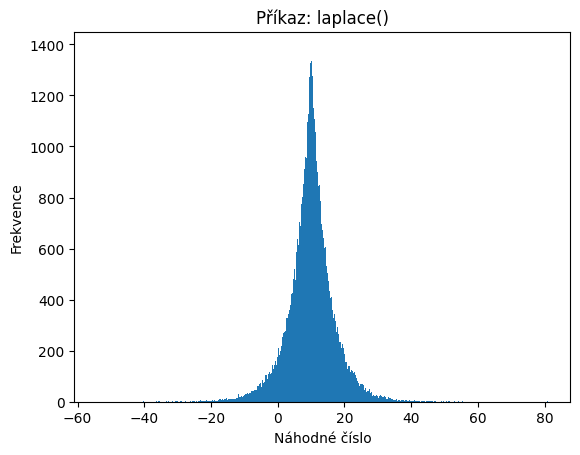

In [12]:
from numpy.random import laplace

#loc = stredni hodnota
#scale = rozptyl
x = laplace(loc=10, scale=5, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: laplace()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Logaritmicko-normální rozdělení**

Spousty lidských (biologických, sociologických, psychologických) vlastností a dějů se řídí normálním rozdělením. Existují procesy tohoto charakteru, které se sčítají. Ty se řídí typicky logaritmicko-normálním rozdělením. Příkladem může být: délka komentářů na diskuzních fóru, čas strávený prohlížením webové stránky, délka šachové partie, geometrické vlastnosti tkání, krevní tlak, velikost růstu vlasů/nehtů v určitém směru, příjem lidí, počet citací vědeckého článku, velikost částic po nárazu drtidlem na těleso, atd.

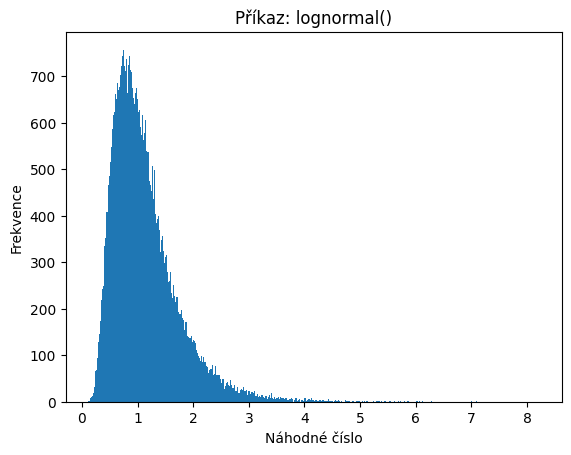

In [13]:
from numpy.random import lognormal

x = lognormal(mean=0, sigma=0.5, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: lognormal()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Rovnoměrné (obdélníkové) rozdělení**

Jedná se o nejvýužívanější rozdělení vůbec. Každá hodnota by měla být při vzorkování (vybírání čísel) stejným počtem zastoupená v určitém časovém intervalu. Jedná se o příklad rozdělení, které využívají funkce jako rand(), randint(), atd. 

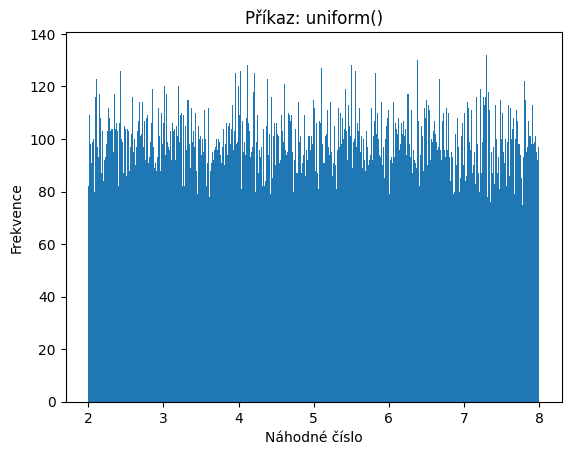

In [14]:
from numpy.random import uniform

#left = nejmenší hodnota
#right = největší hodnota
x = uniform(low=2, high=8, size=100000)
plt.hist(x, bins=1000)
plt.gca().set(title='Příkaz: uniform()', ylabel='Frekvence', xlabel="Náhodné číslo");

**Trojúhelníkové (lack-of-knowledge) rozdělení**

Trojúhelníkové rozdělení se typicky používá v demografických a sociologických studiích, kde máme omezená/nekvalitní data, ale tušíme, jaká hodnota by měla být nejčastější (mode), nejmenší možná a největší možná. Několik dalších aplikací jsou například simulace podnikového rozhodování, kde má manažer empirickou znalost nejčastější hodnoty a dostává tak pro skutečný podnik lepší výsledky než s využitím rovnoměrného rozdělení, nebo při inženýrství zvuku, kde zvukové signály mohou mít tyto charakteristiky. Existuje i vyšší abstrakce tohoto rozdělení jako například lichoběžníkové.

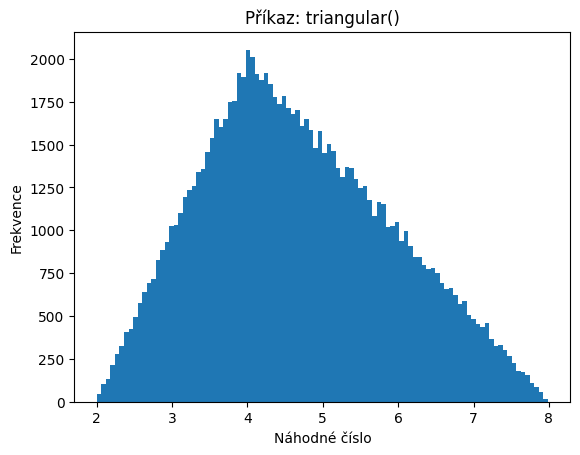

In [15]:
from numpy.random import triangular

#mode = nejčastější hodnota
x = triangular(left=2, mode=4, right=8, size=100000)
plt.hist(x, bins=100)
plt.gca().set(title='Příkaz: triangular()', ylabel='Frekvence', xlabel="Náhodné číslo");

### 7.5 - Testování kvality generátorů

Generátory náhodných čísel tvoří pouze pseudonáhodná čísla, která se opakují po určité periodě a mohou v počítačových simulacích, které mají věrně reprezenzovat skutečné přírodní procesy, zanést určité artefakty. Z toho důvodu je dobré provést test kvality vybraného generátoru pseudonáhodných čísel.

#### Standardizované (Z) skóre

Pravděpodobně nejjednodušší způsob testování kvality generátoru. Pomocí Z-skóre se počítá korelace (souvislost) vzorků.

#### Spektrální test

**Middle-squared metoda**

In [16]:
def msm(x):
    N = len(str(x))
    mocnina = str(x*x).zfill(2*N)
    prostredek = mocnina[0+N//2:N//2+N]
    x = int(prostredek)
    return x

seminko = 14
x = seminko
rand_nums = []
for i in range(10000):
    x = msm(x)
    rand_nums.append(x)
print(rand_nums)

[19, 36, 29, 84, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 7.6 Kryptograficky bezpečné generátory

#### Modul os.urandom

Pro potřeby generování kryptograficky důležitých řetězců (hesla, hash) se využívá v Unixových operačních systémech soubor /dev/urandom, do kterého OS ukládá fyzikální informace ze šumu počítače pomocí ovladačů hardwaru v daném čase. V operačních systémech windows se využívá systémová funkce CryptGenRandom(), která generuje náhodné veličiny na základě fyzických údajů nasbíraných za určitý interval (proces ID, stav operační paměti, atd.).

In [17]:
from os import urandom

x = urandom(6).hex()
print(x)

a9799425de0c


#### Modul secrets

V pythonu existuje modul secrets, který obsahuje některé užitečné funkce pro kryptograficky bezpečné generování. Jedná se o preferovaný způsob generování náhodných znaků. Modul představuje obal kolem os.urandom().

In [18]:
import secrets

print(secrets.token_hex(16))

#URL safe používají zkracovače webových stránek jako tinyurl nebo bit.ly
print(secrets.token_urlsafe(16))

cf9f9eb265368feb4ed15eb4653ff042
kqyqIVdw14b_fpT_kBkctA


In [19]:
from secrets import token_urlsafe

databaze_zkracenych_url = {}

def zkrat_url(url: str, nbytu: int=5) -> str:
    zkraceny_odkaz = token_urlsafe(nbytes=nbytu)                #vygeneruj zkracenou url o zadane velikosti bytu
    if zkraceny_odkaz in databaze_zkracenych_url:               #pokud odkaz jiz existuje v databazi
        return zkrat_url(url, nbytu=nbytu)                      #tak spust generovani od znovu pro dalsi pokus
    else:
        databaze_zkracenych_url.update({zkraceny_odkaz: url})   #pokud je zkracena URL unikatni, uloz ji do DB
        return f'tinyujep.ly/{zkraceny_odkaz}'                  #vrat zkraceny odkaz

urls = (
    "www.ujep.cz",
    "www.prf.ujep.cz",
    "www.ki.ujep.cz"
)

for url in urls:
    print(url, zkrat_url(url))

www.ujep.cz tinyujep.ly/AF_bPwg
www.prf.ujep.cz tinyujep.ly/78IlqBI
www.ki.ujep.cz tinyujep.ly/Bz_JHaU


#### Modul uuid

Zkratka UUID znamená Universally Unique Identifier. Jedná se o 128 bitovou sekvenci (řetězec délky 32), která garantuje unikátnost v prostoru a čase. Modul představuje obal kolem os.urandom().

In [20]:
import uuid

x = uuid.uuid4() #existuje 2**128 možných kombinací (340 undecilionů) znaků, takže by nemělo dojít ke kolizi
print(x)
print(x.int)
print(x.hex)

2a1566fc-a9bd-42d7-9a0f-28f05c5667d9
55938702880803993400208816539337910233
2a1566fca9bd42d79a0f28f05c5667d9
